# Check Data
Check that the coordinates are basically what I expect them to be. Cut and paste a set of data from HORIZONS into an excel file for ease.

In [1]:
%load_ext rpy2.ipython
from rpy2.robjects import r

import os
os.chdir("../data")

C:\Users\david\Miniconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
%%R
# setwd("../data")
packages <- c("ggplot2", "dplyr", "tidyr")
lapply(packages, require, character.only=T)

In [37]:
%%R
# earth center, frame
data <- read.csv("wld18677.15.csv")
data$date <- as.Date(gsub(" A.D. | 00:00:00.0000", "", as.character(data$Calendar.Date..TDB.)), format="%Y-%b-%d")
str(data)

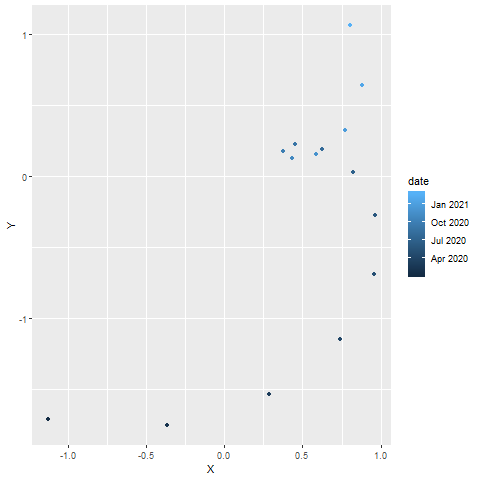

In [38]:
%%R
ggplot(data, aes(x=X, y=Y, colour=date))+
geom_point()

In [14]:
%%R
unique(data$date)

In [15]:
%%R
# sun center, frame
data <- read.csv("wld26141_suncenter.15.csv")
data$date <- as.Date(gsub(" A.D. | 00:00:00.0000", "", as.character(data$Calendar.Date..TDB.)), format="%Y-%b-%d")
str(data)

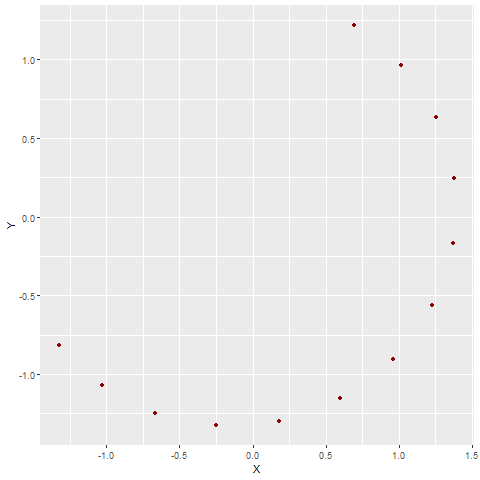

In [16]:
%%R
ggplot(data, aes(x=X, y=Y))+
geom_point(colour="darkred")

In [40]:
%%R
mars <- read.csv("wld26141_suncenter.15.csv")
mars$date <- as.Date(gsub(" A.D. | 00:00:00.0000", "", as.character(mars$Calendar.Date..TDB.)), format="%Y-%b-%d")
# sun center, frame of earth
earth <- read.csv("wld12686_suncenter_viewearth.15.csv")
earth$date <- as.Date(gsub(" A.D. | 00:00:00.0000", "", as.character(earth$Calendar.Date..TDB.)), format="%Y-%b-%d")
data <- rbind(earth, mars)

data$planet <- rep(c("earth","mars"), c(nrow(mars), nrow(earth)))

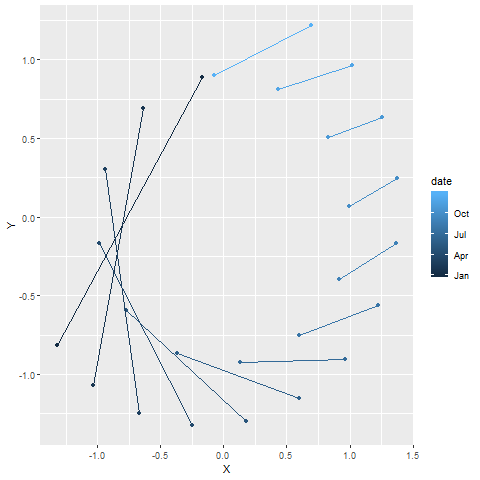

In [41]:
%%R
ggplot(data, aes(x=X, y=Y, colour=date, group=date))+
geom_point()+
geom_line()

In [21]:
%%R
head(data)

In [7]:
%%R
# sun center, eclip
data <- read.csv("wld4866sun_eclip.15.csv")
data$date <- as.Date(gsub(" A.D. | 00:00:00.0000", "", as.character(data$Calendar.Date..TDB.)), format="%Y-%b-%d")
str(data)

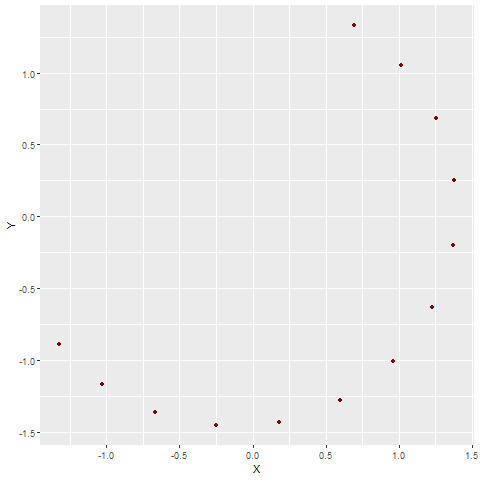

In [8]:
%%R
ggplot(data, aes(x=X, y=Y))+
geom_point(colour="darkred")

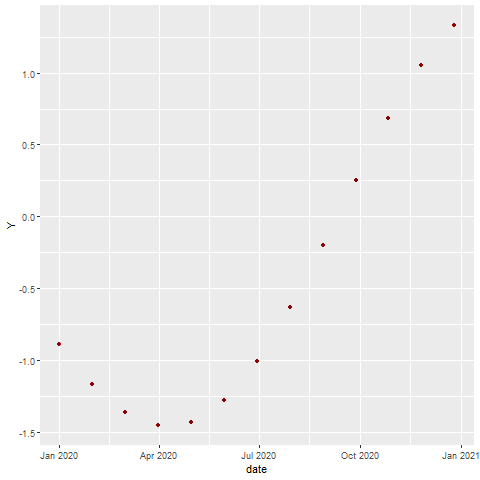

In [9]:
%%R
ggplot(data, aes(x=date, y=Y))+
geom_point(colour="darkred")

In [10]:
%%R
unique(data$date)